## Initial EDA

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re

In [175]:
df = pd.read_csv('data/train.csv')
df = df.set_index('Id')

### Add underscore to the beginning of column names that start with numbers

In [176]:
df.columns = list(map(lambda x: '_' + x if re.match('^\d', x) else x, df.columns))

In [177]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

#### Drop Utilities column because almost all are 'Utilities'

In [178]:
pd.options.display.max_columns = 80
df = df.drop(columns='Utilities')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Automated dictionary creation for type of variable:

In [179]:
# %matplotlib inline
# typeConvertDict = {}
# for column in df.columns:
#     print(column)
#     sns.catplot(data = df, x = column, kind='count')
#     plt.show()
#     currentSuggestion = str(input(prompt = "Ordinal, Categorical, Float, Integer, or Boolean?"))
#     typeConvertDict[column] = currentSuggestion

# f = open("typeConvertDict.pkl","wb")
# pickle.dump(typeConvertDict,f)
# f.close()

In [180]:
# with open('typeConvertDict.pkl', 'rb') as handle:
#     typeConvertDict = pickle.load(handle) 
    
# print(typeConvertDict)

### Show histogram of Sale Prices to see distribution

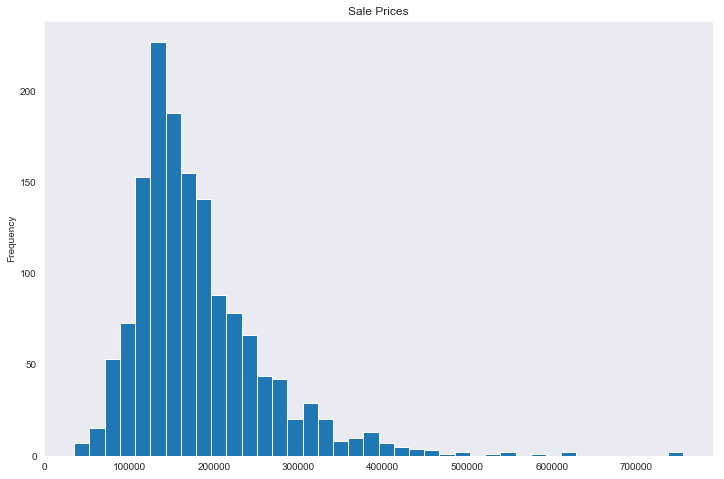

In [164]:
prices = df.SalePrice.plot(kind='hist', bins = 40)
title = plt.title('Sale Prices')

In [165]:
# Ordinal Encoding
# series = pd.Series(
#            np.random.randint(low=0, high=3, size=100))
# preserved_mapper = {2:'large', 1:'medium', 0:'small'}
# ordvar = series.replace(preserved_mapper)

### Convert appropriate ordianal columns to int rank

In [181]:
ord_df = df.copy()

# Lot shape as int
preserved_mapper_LotShape = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg" : 4}
ord_df['LotShape'] = ord_df.LotShape.replace(preserved_mapper_LotShape)

# Land Slope as int
preserved_mapper_LandSlope = {"Sev": 1, "Mod": 2, "Gtl" : 3}
ord_df['LandSlope'] = ord_df.LandSlope.replace(preserved_mapper_LandSlope)

# Overall quality as int

# Overall condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER DROPPING IT

# External quality as int
preserved_mapper_ExterQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['ExterQual'] = ord_df.ExterQual.replace(preserved_mapper_ExterQual)

# External condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER DROPPING IT
preserved_mapper_ExterCond = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['ExterCond'] = ord_df.ExterCond.replace(preserved_mapper_ExterCond)

# Basement quality
preserved_mapper_BsmtQual = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['BsmtQual'] = ord_df.BsmtQual.replace(preserved_mapper_BsmtQual)

# Basement condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER ONE HOT
preserved_mapper_BsmtCond = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['BsmtCond'] = ord_df.BsmtCond.replace(preserved_mapper_BsmtCond)

# Basement exposure
preserved_mapper_BsmtExposure = {"nan" : 0, "No": 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
ord_df['BsmtExposure'] = ord_df.BsmtExposure.replace(preserved_mapper_BsmtExposure)

# Heating QC as int
preserved_mapper_HeatingQC = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['HeatingQC'] = ord_df.HeatingQC.replace(preserved_mapper_HeatingQC)

# Kitchen quality as int
preserved_mapper_KitchenQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['KitchenQual'] = ord_df.KitchenQual.replace(preserved_mapper_KitchenQual)

# Fireplace quality isn't well represented as linear. CONSIDER ONE HOT
preserved_mapper_FireplaceQu = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['FireplaceQu'] = ord_df.FireplaceQu.replace(preserved_mapper_FireplaceQu)

# Functional as int
preserved_mapper_Functional = {"Sal": 0, "Sev" : 1, "Maj2": 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
ord_df['Functional'] = ord_df.Functional.replace(preserved_mapper_Functional)

# GarageQual as int
preserved_mapper_GarageQual = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['GarageQual'] = ord_df.GarageQual.replace(preserved_mapper_GarageQual)

# GarageCond as int
preserved_mapper_GarageCond = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['GarageCond'] = ord_df.GarageCond.replace(preserved_mapper_GarageCond)

# PoolQC as int
preserved_mapper_PoolQC = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['PoolQC'] = ord_df.PoolQC.replace(preserved_mapper_PoolQC)

# BsmtFinType1 as int
preserved_mapper_BsmtFinType1 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
ord_df['BsmtFinType1'] = ord_df.BsmtFinType1.replace(preserved_mapper_BsmtFinType1)

# BsmtFinType2 as int
preserved_mapper_BsmtFinType2 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
ord_df['BsmtFinType2'] = ord_df.BsmtFinType2.replace(preserved_mapper_BsmtFinType2)

# GarageFinish as int
preserved_mapper_GarageFinish = {"NA": 0, "Unf" : 1, "RFn": 2, 'Fin': 3}
ord_df['GarageFinish'] = ord_df.GarageFinish.replace(preserved_mapper_GarageFinish)

# PavedDrive as int
preserved_mapper_PavedDrive = {"N": 0, "P" : 1, "Y": 2}
ord_df['PavedDrive'] = ord_df.PavedDrive.replace(preserved_mapper_PavedDrive)

#### Replace NaN in float columns to 0 and convert all float to int

In [182]:
for col in ord_df.columns:
    if ord_df[col].dtype == 'float64':
        ord_df[col] = ord_df[col].apply(lambda x: 0 if pd.isnull(x) else x)
        ord_df[col] = ord_df[col].apply(int)

In [183]:
ord_list = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'PavedDrive']
ord_df[ord_list].isnull().any()

LotShape        False
LandSlope       False
OverallQual     False
OverallCond     False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
HeatingQC       False
KitchenQual     False
FireplaceQu     False
Functional      False
GarageQual      False
GarageCond      False
PoolQC          False
BsmtFinType1    False
BsmtFinType2    False
GarageFinish    False
PavedDrive      False
dtype: bool

In [184]:
ord_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80,11622,Pave,NaN,4,Lvl,Inside,3,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,CBlock,3,3,1,3,468,2,144,270,882,GasA,3,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,3,5,7,0,0,Attchd,1961,1,1,730,3,3,2,140,0,0,0,120,0,0,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NaN,3,Lvl,Corner,3,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,3,3,CBlock,3,3,1,5,923,1,0,406,1329,GasA,3,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,4,6,7,0,0,Attchd,1958,1,1,312,3,3,2,393,36,0,0,0,0,0,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NaN,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,PConc,4,3,1,6,791,1,0,137,928,GasA,4,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,3,6,7,1,3,Attchd,1997,3,2,482,3,3,2,212,34,0,0,0,0,0,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NaN,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,3,3,PConc,3,3,1,6,602,1,0,324,926,GasA,5,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,4,7,7,1,4,Attchd,1998,3,2,470,3,3,2,360,36,0,0,0,0,0,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NaN,3,HLS,Inside,3,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,4,3,PConc,4,3,1,5,263,1,0,1017,1280,GasA,5,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,4,5,7,0,0,Attchd,1992,2,2,506,3,3,2,0,82,0,0,144,0,0,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NaN,3,Lvl,Corner,3,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,3,3,PConc,4,3,1,1,0,1,0,763,763,GasA,4,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,3,7,7,1,3,Attchd,1993,3,2,440,3,3,2,157,84,0,0,0,0,0,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,0,7980,Pave,NaN,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,3,4,PConc,4,3,1,5,935,1,0,233,1168,GasA,5,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,3,6,7,0,0,Attchd,1992,3,2,420,3,3,2,483,21,0,0,0,0,0,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63,8402,Pave,NaN,3,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,PConc,4,3,1,1,0,1,0,789,789,GasA,4,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,3,7,7,1,4,Attchd,1998,3,2,393,3,3,2,0,75,0,0,0,0,0,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85,10176,Pave,NaN,4,Lvl,Inside,3,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,3,3,PConc,4,3,4,6,637,1,0,663,1300,GasA,4,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,4,5,7,1,1,Attchd,1990,1,2,506,3,3,2,192,0,0,0,0,0,0,NaN,NaN,0,2,2010,WD,Normal


### Use get_dummies to encode remaining string features

#### Convert MoSold feature to string so it can be treated as category

In [185]:
preserved_mapper_MoSold = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ord_df['MoSold'] = ord_df.MoSold.replace(preserved_mapper_MoSold)

In [186]:
transformed = ord_df.copy()
X = pd.get_dummies(transformed.iloc[:, transformed.columns != 'SalePrice'], drop_first=True, dummy_na=True)
y = transformed.SalePrice

# X = pd.get_dummies(transformed, drop_first=True, dummy_na=True)

#### Save dataset as transformed train or test

In [187]:
# X.to_csv('./data/transformed_train.csv')
# X.to_csv('./data/transformed_test.csv')